# Trabalho Prático de Introdução a Ciência dos Dados

## Base: Campeonato Brasileiro de Futebol

Este notebook tem como objetivo desenvolver análises sobre o Campeonato Brasileiro de Futebol. Para isso, foi usada uma base de dados encontrada no site Kaggle ([link](https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol)), que contém 4 CSV's com diferentes estatísticas do campeonato:

- *campeonato-brasileiro-full.csv:* Dados de partidas do campeonato;
- *campeonato-brasileiro-cartoes.csv:* Dados de cartões;
- *campeonato-brasileiro-estatisticas-full.csv:* Dados de estatísticas das partidas (posse de bola, precisão de passes, nº de impedimentos, etc.);
- *campeonato-brasileiro-gols.csv:* Dados de gols marcados.


### Perguntas: 

- Qual rendimento um time precisa ter em casa e fora para ser campeão?
- Existe alguma relação entre a colocação de um time no campeonato e o estado de qual ele vem?
- Existe alguma relação entre gols pro e contra para que o time seja campeão?
- Existe alguma relação entre posse de bola e vitória?
- Quantas finalizações em média são necessárias para gerar um gol?

## 1. Análise exploratória

### 1.1 Bibliotecas Necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1.2 Tratamentos das bases de dados

In [2]:
camp_bras_full = pd.read_csv('campeonato-brasileiro-full.csv', sep=',')
camp_bras_cartoes = pd.read_csv('campeonato-brasileiro-cartoes.csv', sep=',')
camp_bras_estatisticas = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv', sep=',')
camp_bras_gols = pd.read_csv('campeonato-brasileiro-gols.csv', sep=',')

In [3]:
camp_bras_full.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [4]:
camp_bras_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8025 non-null   int64 
 1   rodata              8025 non-null   int64 
 2   data                8025 non-null   object
 3   hora                8025 non-null   object
 4   mandante            8025 non-null   object
 5   visitante           8025 non-null   object
 6   formacao_mandante   3051 non-null   object
 7   formacao_visitante  3051 non-null   object
 8   tecnico_mandante    3415 non-null   object
 9   tecnico_visitante   3415 non-null   object
 10  vencedor            8025 non-null   object
 11  arena               8025 non-null   object
 12  mandante_Placar     8025 non-null   int64 
 13  visitante_Placar    8025 non-null   int64 
 14  mandante_Estado     8025 non-null   object
 15  visitante_Estado    8025 non-null   object
dtypes: int64(4), object(12)


In [5]:
# Talvez retirar as colunas que possuem valores nulos seja menos radical, pois talvez sejam informações menos relevantes
# camp_bras_full = camp_bras_full.dropna()
# camp_bras_full.info()
# camp_bras_full

No csv *camp_bras_full* as colunas formacao_mandante, formacao_visitante, tecnico_mandante e tecnico_visitante tem aproximadamente metade das linhas nulas. Como não são muito relevantes para nossas análises, resolvemos retirá-las.

In [6]:
camp_bras_full = camp_bras_full.drop(columns=['formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante'])
camp_bras_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                8025 non-null   int64 
 1   rodata            8025 non-null   int64 
 2   data              8025 non-null   object
 3   hora              8025 non-null   object
 4   mandante          8025 non-null   object
 5   visitante         8025 non-null   object
 6   vencedor          8025 non-null   object
 7   arena             8025 non-null   object
 8   mandante_Placar   8025 non-null   int64 
 9   visitante_Placar  8025 non-null   int64 
 10  mandante_Estado   8025 non-null   object
 11  visitante_Estado  8025 non-null   object
dtypes: int64(4), object(8)
memory usage: 752.5+ KB


A coluna rodata foi renomeada pois é um erro de grafia da palavra rodada, erro presente nos 4 CSV's. Já o campo ID foi renomeado para manter conformidade com os outros arquivos, que nomeiam esse campo como partida_id.

In [7]:
camp_bras_full.rename(columns={'ID': 'partida_id', 'rodata': 'rodada'}, inplace=True)
camp_bras_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   partida_id        8025 non-null   int64 
 1   rodada            8025 non-null   int64 
 2   data              8025 non-null   object
 3   hora              8025 non-null   object
 4   mandante          8025 non-null   object
 5   visitante         8025 non-null   object
 6   vencedor          8025 non-null   object
 7   arena             8025 non-null   object
 8   mandante_Placar   8025 non-null   int64 
 9   visitante_Placar  8025 non-null   int64 
 10  mandante_Estado   8025 non-null   object
 11  visitante_Estado  8025 non-null   object
dtypes: int64(4), object(8)
memory usage: 752.5+ KB


As colunas de data e hora foram combinadas para facilitar análises temporais.

In [8]:
camp_bras_full['horario_partida'] = pd.to_datetime(camp_bras_full['data'] + ' ' + camp_bras_full['hora'])

/tmp/ipykernel_6908/3694699173.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  camp_bras_full['horario_partida'] = pd.to_datetime(camp_bras_full['data'] + ' ' + camp_bras_full['hora'])


In [9]:
camp_bras_full = camp_bras_full.drop(columns=['data', 'hora'])
camp_bras_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   partida_id        8025 non-null   int64         
 1   rodada            8025 non-null   int64         
 2   mandante          8025 non-null   object        
 3   visitante         8025 non-null   object        
 4   vencedor          8025 non-null   object        
 5   arena             8025 non-null   object        
 6   mandante_Placar   8025 non-null   int64         
 7   visitante_Placar  8025 non-null   int64         
 8   mandante_Estado   8025 non-null   object        
 9   visitante_Estado  8025 non-null   object        
 10  horario_partida   8025 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 689.8+ KB


In [10]:
# Quantidade de Partidas por ano
camp_bras_full.groupby(camp_bras_full['horario_partida'].dt.year)['partida_id'].count()

horario_partida
2003    552
2004    552
2005    462
2006    380
2007    380
2008    380
2009    380
2010    380
2011    380
2012    380
2013    380
2014    380
2015    380
2016    379
2017    380
2018    380
2019    380
2020    268
2021    492
2022    380
Name: partida_id, dtype: int64

In [11]:
# Partidas disputadas no ano de 2018
camp_bras_full[camp_bras_full['horario_partida'].dt.year == 2018]

,partida_id,rodada,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,horario_partida
6125,6126,1,Cruzeiro,Gremio,Gremio,Mineirão,0,1,MG,RS,2018-04-14 16:00:00
6126,6127,1,Vitoria,Flamengo,-,Barradão,2,2,BA,RJ,2018-04-14 19:02:00
6127,6128,1,Santos,Ceara,Santos,Estádio Municipal Paulo Machado de Carvalho,2,0,SP,CE,2018-04-14 21:03:00
6128,6129,1,America-MG,Sport,America-MG,Estádio Raimundo Sampaio,3,0,MG,PE,2018-04-15 11:00:00
6129,6130,1,Vasco,Atletico-MG,Vasco,Estádio Vasco da Gama,2,1,RJ,MG,2018-04-15 16:01:00
...,...,...,...,...,...,...,...,...,...,...,...
6500,6501,38,Sport,Santos,Sport,Adelmar da Costa Carvalho,2,1,PE,SP,2018-12-02 17:04:00
6501,6502,38,Parana,Internacional,-,Vila Capanema,1,1,PR,RS,2018-12-02 17:00:00
6502,6503,38,Fluminense,America-MG,Fluminense,Maracanã,1,0,RJ,MG,2018-12-02 17:04:00
6503,6504,38,Chapecoense,Sao Paulo,Chapecoense,Arena Condá,1,0,SC,SP,2018-12-02 17:04:00


In [12]:
camp_bras_cartoes.head()

,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
1,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
2,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86
3,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10
4,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44


In [13]:
camp_bras_cartoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16739 entries, 0 to 16738
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   partida_id  16739 non-null  int64  
 1   rodata      16739 non-null  int64  
 2   clube       16739 non-null  object 
 3   cartao      16739 non-null  object 
 4   atleta      16733 non-null  object 
 5   num_camisa  16353 non-null  float64
 6   posicao     15541 non-null  object 
 7   minuto      16739 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.0+ MB


In [14]:
# Retirando apenas a coluna
# camp_bras_cartoes = camp_bras_cartoes.dropna()
# camp_bras_cartoes.info()

Removemos as colunas posicao e num_camisa, que contém uma quantidade significativa de valores nulos.

In [15]:
camp_bras_cartoes = camp_bras_cartoes.drop(columns=['posicao', 'num_camisa'])
camp_bras_cartoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16739 entries, 0 to 16738
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   partida_id  16739 non-null  int64 
 1   rodata      16739 non-null  int64 
 2   clube       16739 non-null  object
 3   cartao      16739 non-null  object
 4   atleta      16733 non-null  object
 5   minuto      16739 non-null  object
dtypes: int64(2), object(4)
memory usage: 784.8+ KB


In [16]:
camp_bras_cartoes[camp_bras_cartoes['atleta'].isnull() == True]

,partida_id,rodata,clube,cartao,atleta,minuto
8474,6303,20,Vitoria,Amarelo,NaN,63
8964,6420,30,Vitoria,Amarelo,NaN,34
12363,7124,24,Internacional,Amarelo,NaN,58
13094,7291,3,Internacional,Vermelho,NaN,52
13183,7309,5,Internacional,Amarelo,NaN,65
13287,7332,7,Internacional,Amarelo,NaN,37


Como apenas 6 linhas tem a coluna atleta nula, removemos apenas esses registros em vez da coluna inteira.

In [17]:
camp_bras_cartoes = camp_bras_cartoes[camp_bras_cartoes['atleta'].notna()]
camp_bras_cartoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16733 entries, 0 to 16738
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   partida_id  16733 non-null  int64 
 1   rodata      16733 non-null  int64 
 2   clube       16733 non-null  object
 3   cartao      16733 non-null  object
 4   atleta      16733 non-null  object
 5   minuto      16733 non-null  object
dtypes: int64(2), object(4)
memory usage: 915.1+ KB


In [18]:
camp_bras_cartoes.rename(columns={'rodata': 'rodada'}, inplace=True)
camp_bras_cartoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16733 entries, 0 to 16738
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   partida_id  16733 non-null  int64 
 1   rodada      16733 non-null  int64 
 2   clube       16733 non-null  object
 3   cartao      16733 non-null  object
 4   atleta      16733 non-null  object
 5   minuto      16733 non-null  object
dtypes: int64(2), object(4)
memory usage: 915.1+ KB


In [20]:
camp_bras_estatisticas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16050 entries, 0 to 16049
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       16050 non-null  int64 
 1   rodata           16050 non-null  int64 
 2   clube            16050 non-null  object
 3   chutes           16050 non-null  int64 
 4   chutes_no_alvo   16050 non-null  int64 
 5   posse_de_bola    6060 non-null   object
 6   passes           16050 non-null  int64 
 7   precisao_passes  3752 non-null   object
 8   faltas           16050 non-null  int64 
 9   cartao_amarelo   16050 non-null  int64 
 10  cartao_vermelho  16050 non-null  int64 
 11  impedimentos     16050 non-null  int64 
 12  escanteios       16050 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.6+ MB


In [21]:
# Retirar todos os registros que tem alguma coluna com NaN perde muita informação
# Avaliar a viabilidade de fazer uma substituição por algum valor, p.e. média, porcentagem igual
# camp_bras_estatisticas = camp_bras_estatisticas.dropna()
# camp_bras_estatisticas.info()

In [22]:
camp_bras_estatisticas[camp_bras_estatisticas['posse_de_bola'].isnull()]

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13697,6849,35,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
13766,6884,38,Avai,0,0,NaN,0,NaN,0,0,0,0,0
13767,6884,38,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
14018,7015,13,Atletico-MG,0,0,NaN,0,NaN,0,0,0,0,0


In [23]:
camp_bras_estatisticas.describe()

,partida_id,rodata,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
count,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000,16050.000000
mean,4013.000000,20.163240,4.841308,1.207975,159.068910,5.677695,0.862368,0.047664,0.613271,1.976947
std,2316.690109,11.465597,6.924779,2.280282,213.129689,7.793185,1.416964,0.232900,1.209620,3.131383
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4013.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6019.000000,30.000000,10.000000,2.000000,374.000000,13.000000,2.000000,0.000000,1.000000,4.000000
max,8025.000000,46.000000,37.000000,16.000000,848.000000,34.000000,10.000000,3.000000,10.000000,23.000000


In [24]:
camp_bras_estatisticas[~camp_bras_estatisticas['posse_de_bola'].isnull()]

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
9458,4741,13,Chapecoense,15,0,35%,280,NaN,19,4,0,0,8
9459,4741,13,Flamengo,9,0,65%,509,NaN,13,1,0,1,5
9594,4808,20,Palmeiras,10,0,44%,384,NaN,18,4,0,1,5
9595,4808,20,Criciuma,10,0,56%,471,NaN,17,3,0,1,6
9644,4833,22,Coritiba,9,0,43%,360,NaN,14,5,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16045,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4
16046,8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5
16048,8025,38,Goias,6,2,35%,330,80%,12,2,0,1,3


In [25]:
camp_bras_estatisticas['posse_de_bola'].replace(to_replace='%', value='', regex=True, inplace=True)
camp_bras_estatisticas['posse_de_bola'].replace(to_replace='None', value=0, regex=False, inplace=True)
camp_bras_estatisticas['posse_de_bola'].fillna(0, inplace=True)
camp_bras_estatisticas['posse_de_bola'] = camp_bras_estatisticas['posse_de_bola'].astype(float)/100
camp_bras_estatisticas

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,0.00,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,0.00,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,0.00,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,0.00,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,0.00,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16045,8023,38,Atletico-MG,17,7,0.41,351,82%,19,6,0,0,4
16046,8024,38,Internacional,15,8,0.48,287,77%,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,0.52,306,82%,17,3,0,2,5
16048,8025,38,Goias,6,2,0.35,330,80%,12,2,0,1,3


In [26]:
camp_bras_estatisticas['precisao_passes'].replace(to_replace='%', value='', regex=True, inplace=True)
camp_bras_estatisticas['precisao_passes'].replace(to_replace='None', value=0, regex=False, inplace=True)
camp_bras_estatisticas['precisao_passes'].fillna(0, inplace=True)
camp_bras_estatisticas['precisao_passes'] = camp_bras_estatisticas['precisao_passes'].astype(float)/100
camp_bras_estatisticas

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,0.00,0,0.00,0,0,0,0,0
1,1,1,Vasco,0,0,0.00,0,0.00,0,0,0,0,0
2,2,1,Athletico-PR,0,0,0.00,0,0.00,0,0,0,0,0
3,2,1,Gremio,0,0,0.00,0,0.00,0,0,0,0,0
4,3,1,Flamengo,0,0,0.00,0,0.00,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16045,8023,38,Atletico-MG,17,7,0.41,351,0.82,19,6,0,0,4
16046,8024,38,Internacional,15,8,0.48,287,0.77,13,2,0,1,6
16047,8024,38,Palmeiras,11,2,0.52,306,0.82,17,3,0,2,5
16048,8025,38,Goias,6,2,0.35,330,0.80,12,2,0,1,3


In [ ]:
camp_bras_cartoes.rename(columns={'rodata': 'rodada'}, inplace=True)

In [27]:
camp_bras_estatisticas.query('partida_id == 6126')

,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
12250,6126,1,Cruzeiro,12,2,0.4,425,0.81,20,3,0,0,7
12251,6126,1,Gremio,6,2,0.6,649,0.86,15,1,1,3,4


In [28]:
camp_bras_gols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   partida_id   7986 non-null   int64 
 1   rodata       7986 non-null   int64 
 2   clube        7986 non-null   object
 3   atleta       7986 non-null   object
 4   minuto       7986 non-null   object
 5   tipo_de_gol  971 non-null    object
dtypes: int64(2), object(4)
memory usage: 374.5+ KB


Os gols tipo NaN são gols "comuns" da partida, que não são gols contra, de pênalti, de falta, etc.

In [42]:
camp_bras_gols.fillna(value={'tipo_de_gol': 'Comum'}, inplace=True)
camp_bras_gols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   partida_id   7986 non-null   int64 
 1   rodata       7986 non-null   int64 
 2   clube        7986 non-null   object
 3   atleta       7986 non-null   object
 4   minuto       7986 non-null   object
 5   tipo_de_gol  7986 non-null   object
dtypes: int64(2), object(4)
memory usage: 374.5+ KB


In [43]:
camp_bras_gols.tail()

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
7981,8019,38,Atletico-GO,Dudu,17,Comum
7982,8021,38,Cuiaba,Jonathan Cafú,44,Comum
7983,8024,38,Internacional,Alexandre Alemão,39,Comum
7984,8025,38,Sao Paulo,Marcos Guilherme,77,Comum
7985,8018,38,Ceara,Erick,89,Penalty


In [32]:
mandante_gols = camp_bras_full.groupby('mandante')['mandante_Placar'].sum()
visitante_gols = camp_bras_full.groupby('visitante')['visitante_Placar'].sum()
gols_totais = mandante_gols + visitante_gols

In [33]:
print(mandante_gols.Avai, visitante_gols.Avai)

171 103


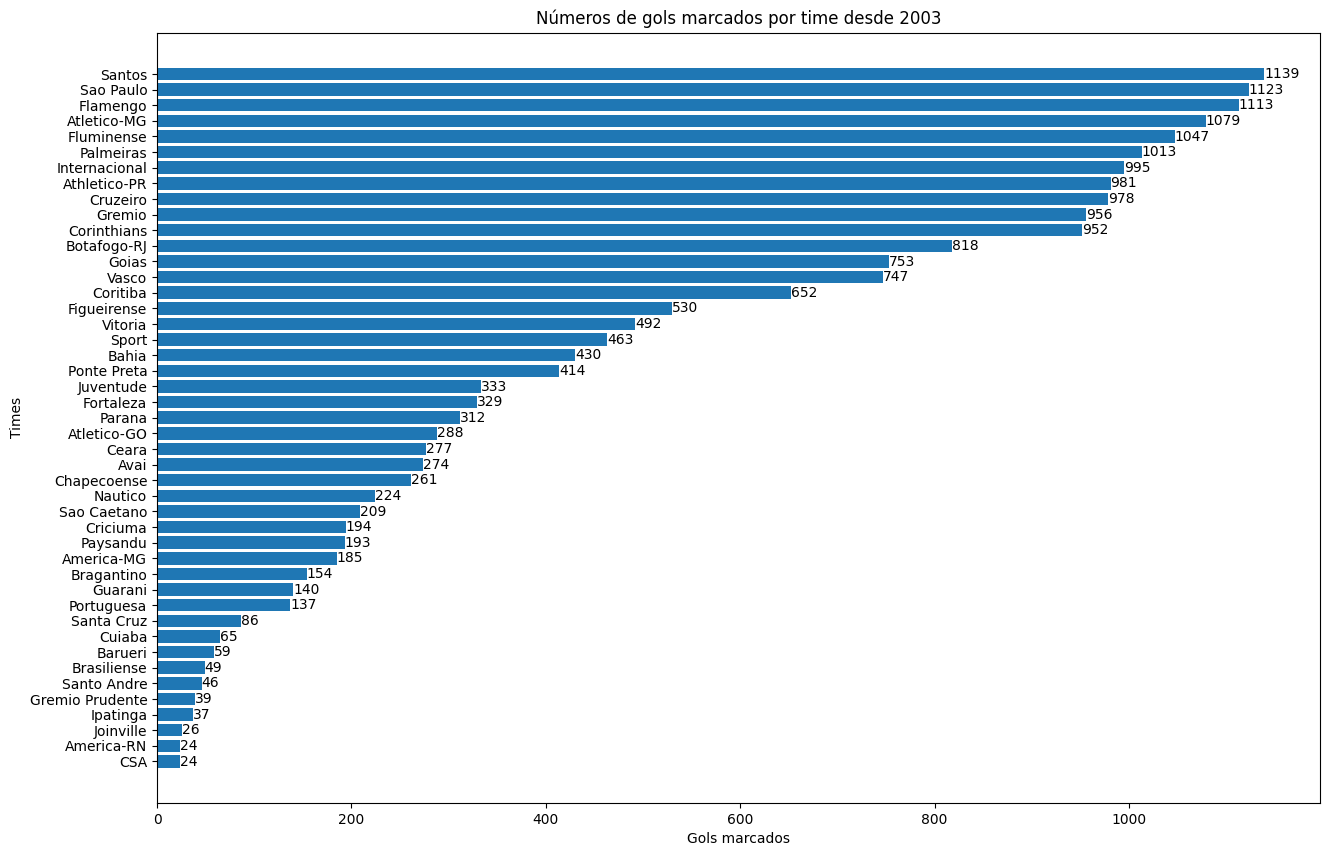

In [34]:
fig, ax = plt.subplots()

fig.set_figwidth(15)
fig.set_figheight(10)

gols = gols_totais.sort_values(ascending=True)

bars = ax.barh(gols.index, gols)
ax.bar_label(bars)

ax.set_title('Número de gols marcados por time desde 2003')
ax.set_xlabel('Gols marcados')
ax.set_ylabel('Times')
plt.show()

In [35]:
gols_sofridos_m = camp_bras_full.groupby('mandante')['visitante_Placar'].sum()
gols_sofridos_v = camp_bras_full.groupby('visitante')['mandante_Placar'].sum()
gols_sofridos_totais = gols_sofridos_m + gols_sofridos_v

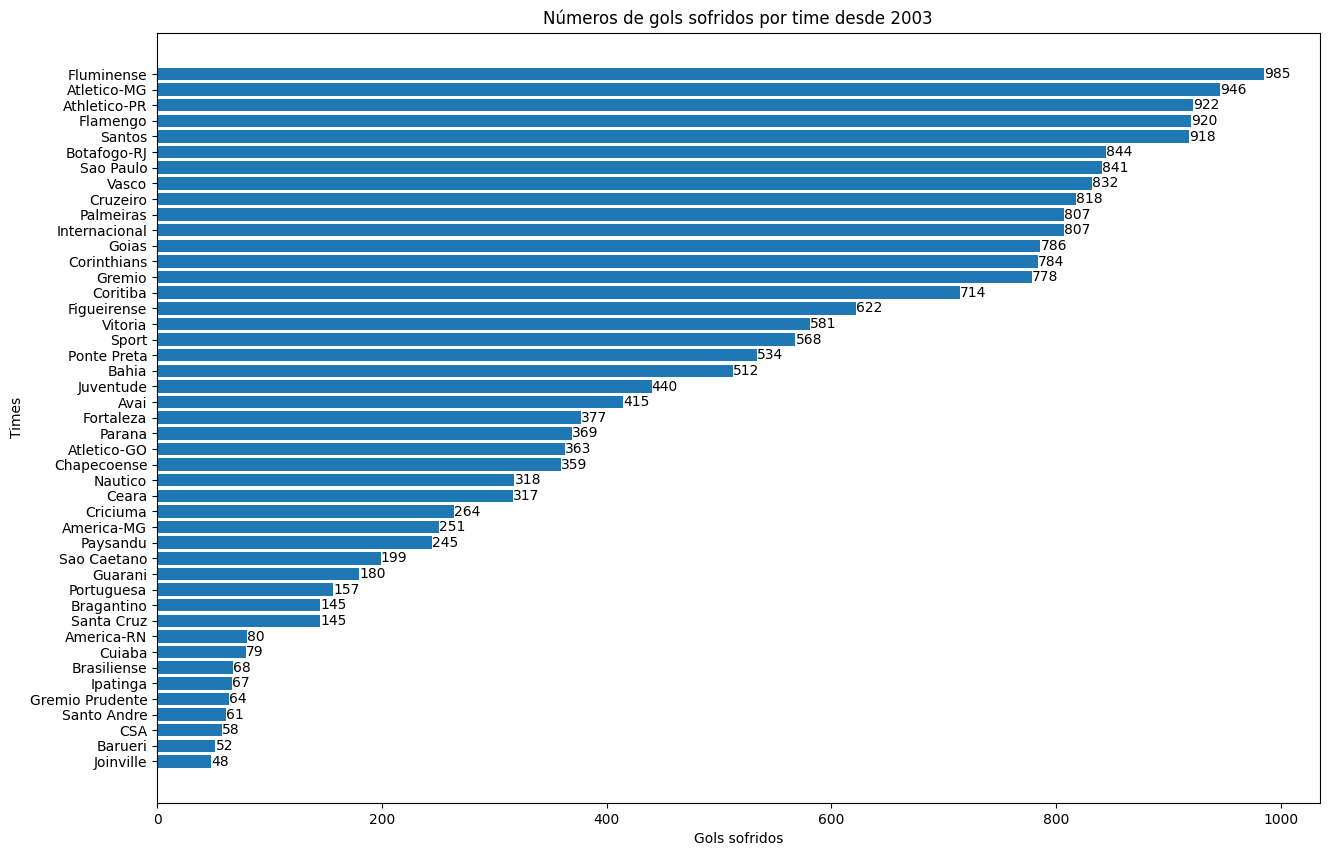

In [36]:
fig, ax = plt.subplots()

fig.set_figwidth(15)
fig.set_figheight(10)

gols_sofridos = gols_sofridos_totais.sort_values(ascending=True)

bars = ax.barh(gols_sofridos.index, gols_sofridos)
ax.bar_label(bars)

ax.set_title('Número de gols sofridos por time desde 2003')
ax.set_xlabel('Gols sofridos')
ax.set_ylabel('Times')
plt.show()

In [37]:
saldo = gols - gols_sofridos
saldo_total = saldo.sort_values(ascending=True)

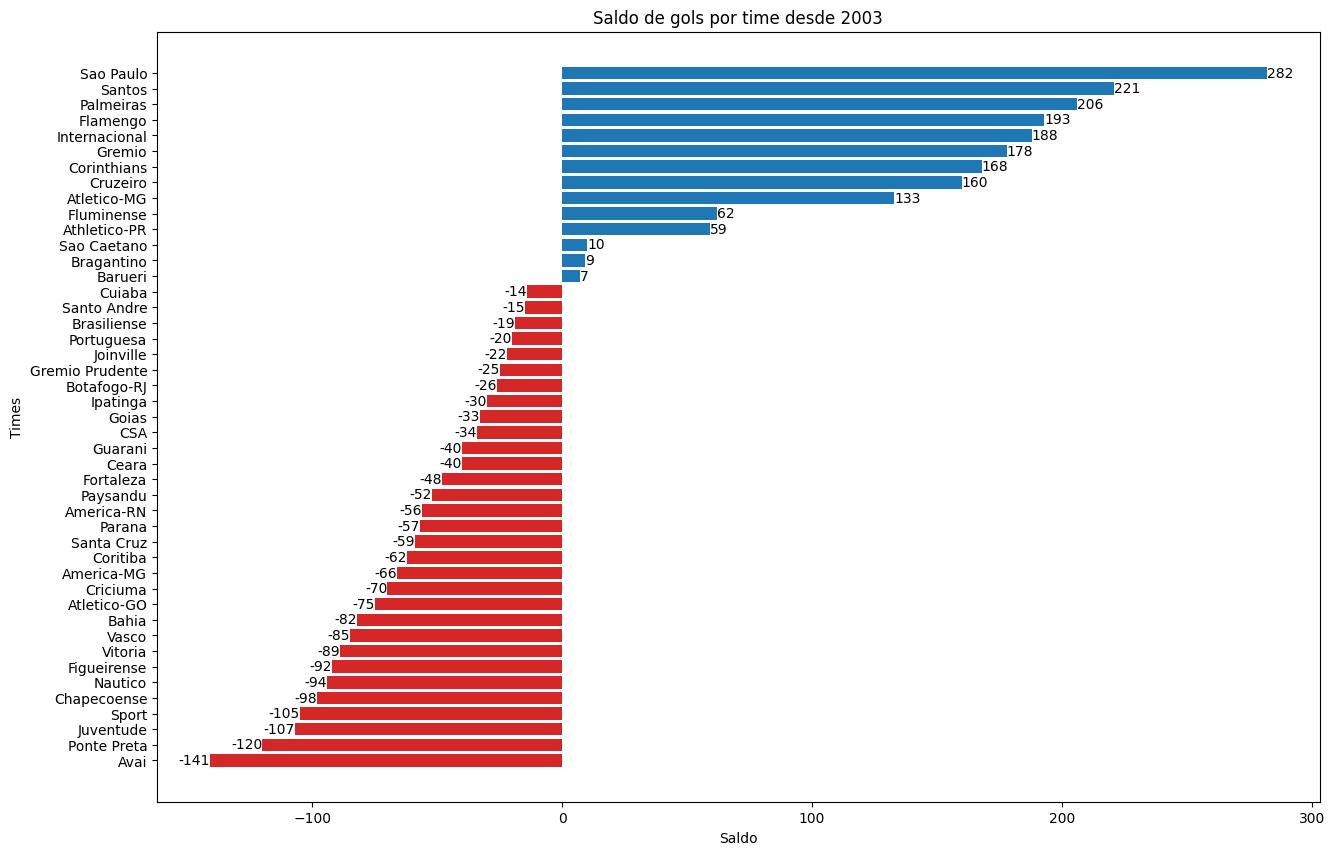

In [38]:
fig, ax = plt.subplots()

colormat=np.where(saldo_total>0, 'tab:blue','tab:red')

fig.set_figwidth(15)
fig.set_figheight(10)

bars = ax.barh(saldo_total.index, saldo_total, color=colormat)
ax.bar_label(bars)

ax.set_title('Saldo de gols por time desde 2003')
ax.set_xlabel('Saldo')
ax.set_ylabel('Times')
plt.show()

In [39]:
finalizacao_total = camp_bras_estatisticas.query('partida_id >= 4987')['chutes'].sum()
finalizacao_total

77312

In [40]:
mandante_gols_totais = camp_bras_full.query('partida_id >= 4987')['mandante_Placar'].sum()
visitante_gols_totais = camp_bras_full.query('partida_id >= 4987')['visitante_Placar'].sum()
gols_feitos = mandante_gols_totais + visitante_gols_totais
media = (finalizacao_total / gols_feitos).round(2)
media

10.85

### Distribuições Temporais